# W11 - November 3 - Plotly: Interactive plotting

Plotly is a third-party library (not in the Standard Libraray), included with the Anaconda Distribution. Hence, you don't need to install it in the default Anaconda environment (`base`).

**Why use Plotly?**

`plotly.py` is an ***interactive***, open-source plotting library built on top of the Plotly JavaScript library (`plotly.js`). It supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
 
https://plotly.com/python/

It contains a low level module `plotly.graph_objects` that offers a lot of customizability, as well as a high-level module `plotly.express` that offers simplicity, especially when working with `pandas` DataFrames.

In [1]:
import plotly.graph_objects as go
import plotly.express as px

import numpy as np
import pandas as pd

## The Figure Data Structure

At a low level, figures can be represented as dictionaries

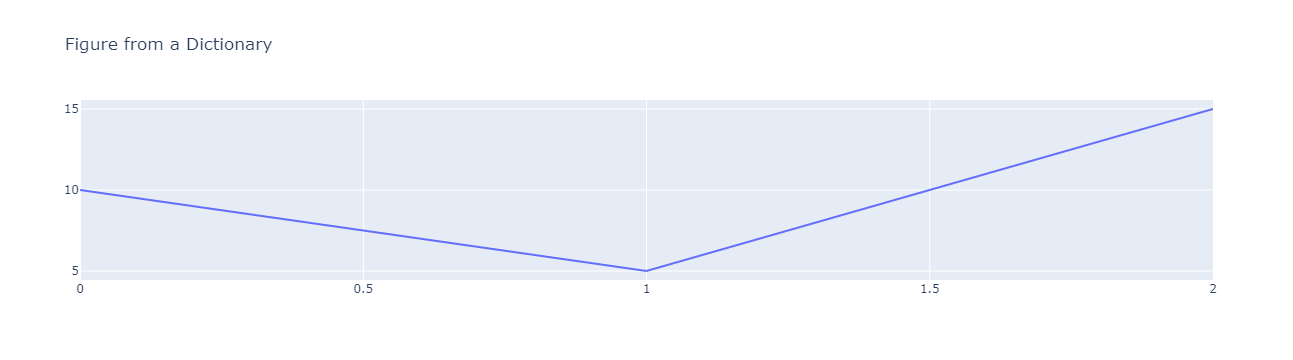

{'data': [{'type': 'scatter', 'x': [0, 1, 2], 'y': [10, 5, 15], 'mode': 'lines'}], 'layout': {'title': {'text': 'Figure from a Dictionary'}}}


In [2]:
fig_dict = {
    "data": [{"type": "scatter",
              "x": [0, 1, 2],
              "y": [10, 5, 15],
              "mode": "lines",
             }],
    "layout": {"title": {"text": "Figure from a Dictionary"}}
}

go.Figure(fig_dict).show()
print(fig_dict)

However, the `plotly.graph_objects` module provides an automatically-generated hierarchy of classes called "graph objects" that may be used to represent figures, with a top-level class `plotly.graph_objects.Figure`.

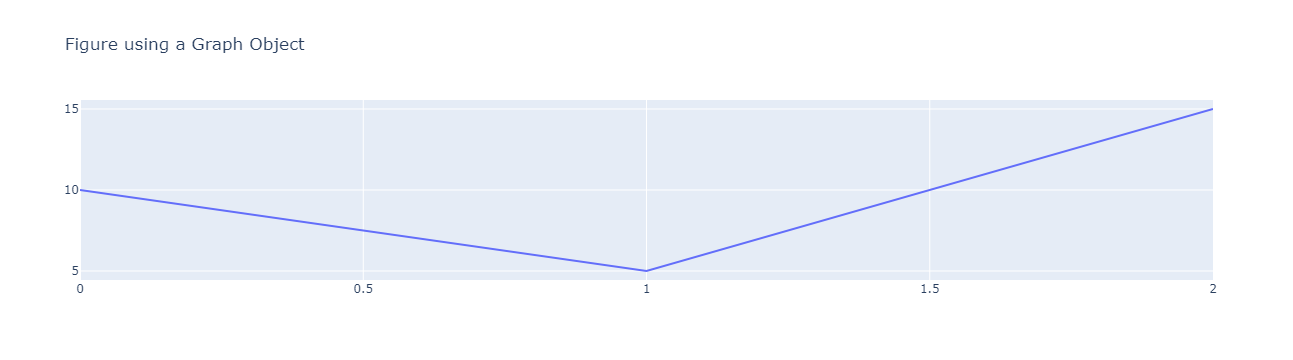

Figure({
    'data': [{'mode': 'lines', 'type': 'scatter', 'x': [0, 1, 2], 'y': [10, 5, 15]}],
    'layout': {'template': '...', 'title': {'text': 'Figure using a Graph Object'}}
})


In [3]:
fig_go = go.Figure(
    data=go.Scatter(
        x=[0, 1, 2], y=[10, 5, 15],
        mode="lines",
    ),
    layout=go.Layout(
        title=go.layout.Title(text="Figure using a Graph Object")
    ),
)
fig_go.show()
print(fig_go)

`plotly.express` is a high-level data visualization API that produces fully-populated graph object figures in single function-calls.

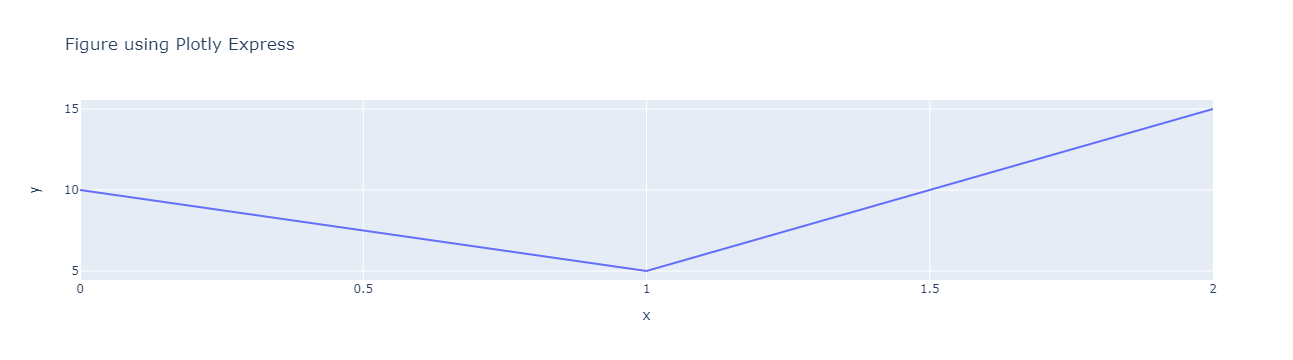

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([10,  5, 15], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Figure using Plotly Express'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


In [4]:
fig_px = px.line(x=[0, 1, 2], y=[10, 5, 15], title="Figure using Plotly Express")
fig_px.show()
print(fig_px)

## Updating Figures

The layout can be updated using the `update_layout()` method.

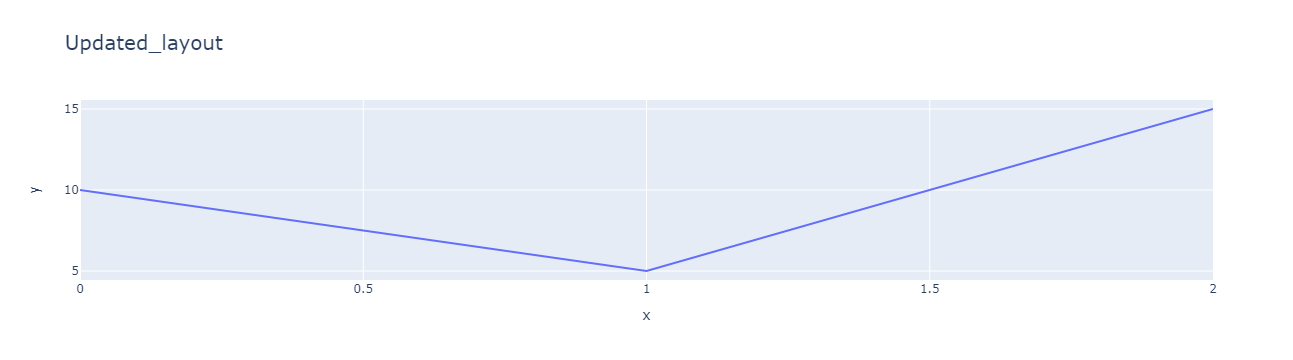

In [5]:
fig_go.update_layout(
    title=dict(
        text="Updated_layout",
        font_size=20
    ),
    xaxis=dict(title="x"),
    yaxis=dict(title="y"),
)

**New traces** can be added to any Figure using the `add_trace()` method.

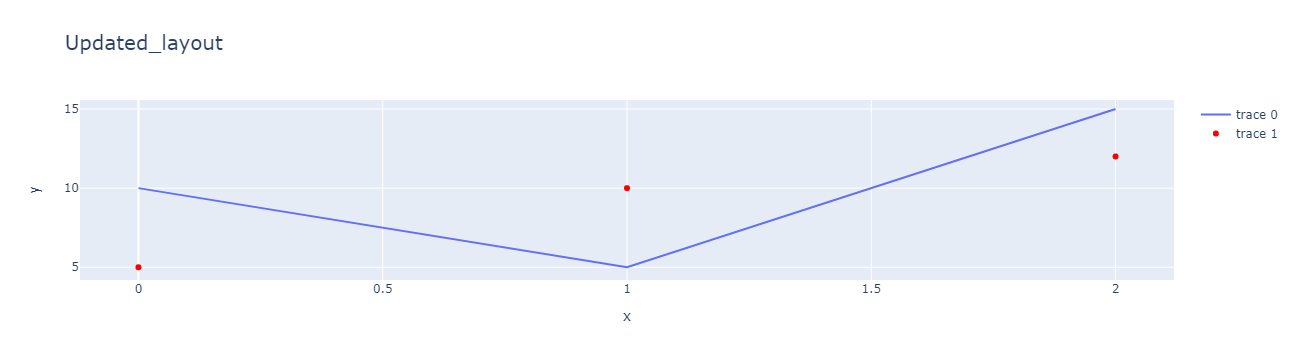

In [6]:
fig_go.add_trace(
    go.Scatter(
        x=[0, 1, 2], y=[5, 10, 12],
        mode = "markers",
        line = {"color": "red"},
    ),
)

And traces can also be updated

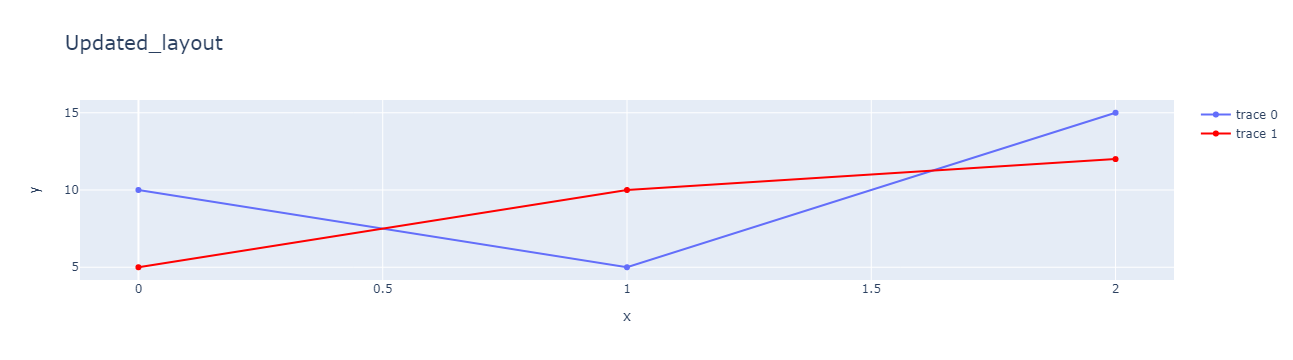

In [7]:
fig_go.update_traces(mode="lines+markers")

There are also convenience underscore methods (e.g., `add_scatter()`) for the different types of plots

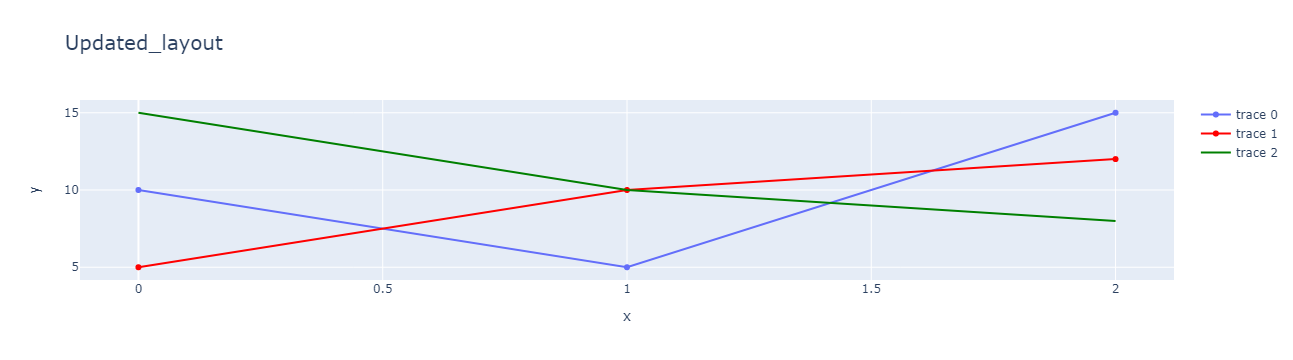

In [8]:
fig_go.add_scatter(
    x=[0, 1, 2], y=[15, 10, 8],
    mode="lines", 
    line={"color": "green"}
)

In fact, "magic underscores" are available as a convenience for a number of features.

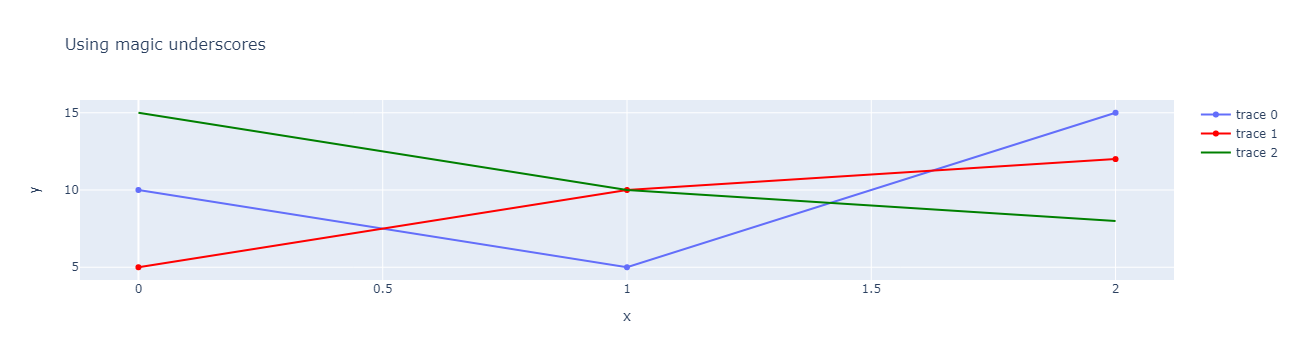

In [9]:
fig_go.update_layout(title_text="Using magic underscores",
                     title_font_size=16)

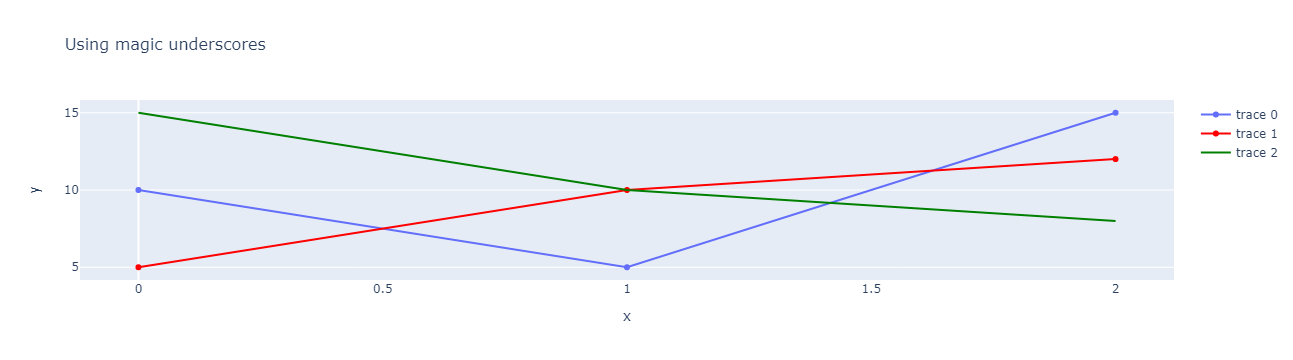

In [10]:
fig_go.update_xaxes(showgrid=False)

### Subplots

`plotly.subplots.make_subplots()` produces a graph object Figure that is preconfigured with a grid of subplots. Traces can be added to each subplot using `add_trace()`.

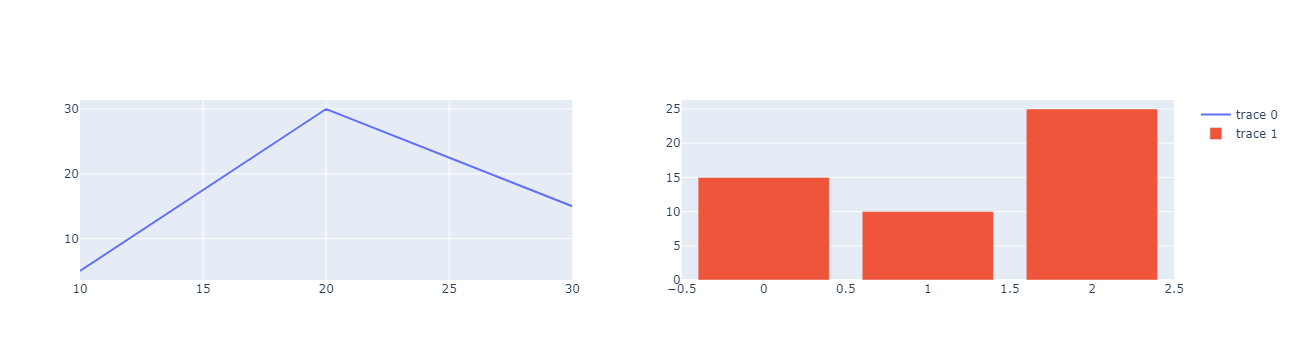

In [11]:
from plotly.subplots import make_subplots

fig_sp = make_subplots(rows=1, cols=2)

fig_sp.add_trace(
    go.Scatter(
        x=[10, 20, 30], y=[5, 30, 15],
        mode="lines",
    ), row=1, col=1,
)
fig_sp.add_trace(
    go.Bar(
        y=[15, 10, 25],
    ), row=1, col=2,
)
fig_sp.show()

## Styling plots

Just like in `matplotlib`, the color and style of lines and markers (and even legends) can be easily changed.

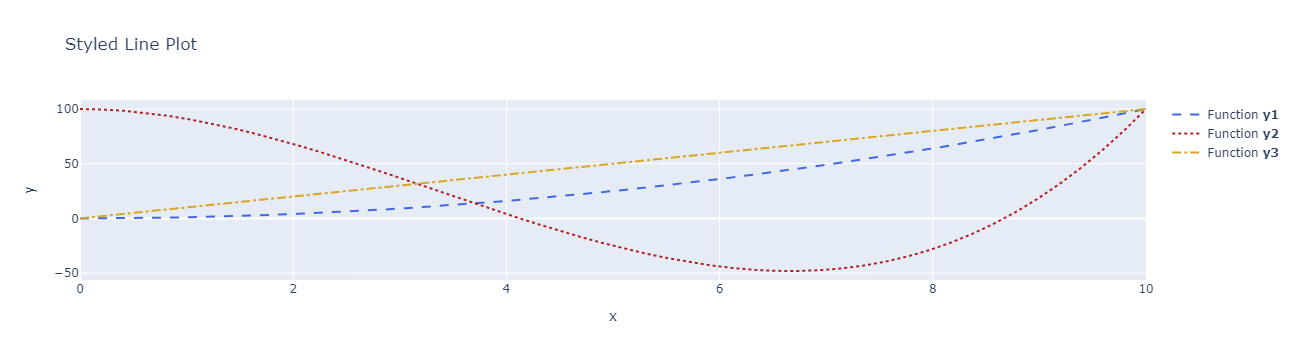

In [12]:
x = np.linspace(0, 10)
y1 = x**2
y2 = x**3 - 10*x**2 + 100
y3 = 10*x

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=x, y=y1,
        name="Function <b>y1</b>",  # using HTML formatting elements
        mode='lines',
        line=dict(color="royalblue", dash="dash"),  # using dictionary
    ),
)
fig.add_trace(
    go.Scatter(
        x=x, y=y2,
        name="Function <b>y2</b>",  # using HTML formatting elements
        mode='lines',
        line_color="firebrick",  # using magic underscore
        line_dash="dot",  # using magic underscore
    ),
)
fig.add_trace(
    go.Scatter(
        x=x, y=y3,
        name="Function <b>y3</b>",  # using HTML formatting elements
        mode='lines',
        line_color="goldenrod",  # using magic underscore
        line_dash="dashdot",  # using magic underscore
    ),
)
fig.update_layout(
    title='Styled Line Plot',
    xaxis_title="x",
    yaxis_title="y",)
fig.show()

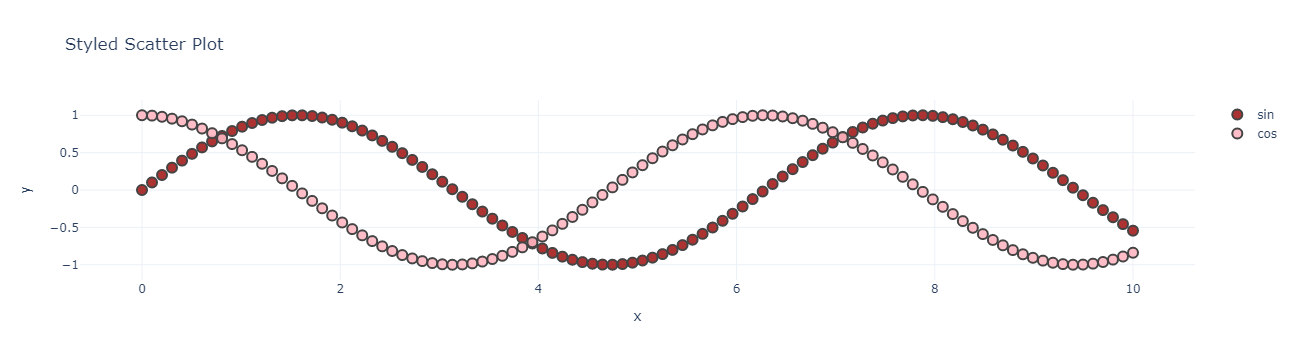

In [13]:
t = np.linspace(0, 10, 100)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=t, y=np.sin(t),
        name='sin',
        marker_color='rgba(152, 0, 0, .8)',  # using rgb colors
    ),
)
fig.add_trace(
    go.Scatter(
        x=t, y=np.cos(t),
        name='cos',
        marker_color='rgba(255, 182, 193, .9)'  # using rgb colors
    ),
)
# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter Plot',
                  xaxis_title="x",
                  yaxis_title="y",
                  yaxis_zeroline=False, xaxis_zeroline=False,
                  template="plotly_white",  # change template
                 )
fig.show()

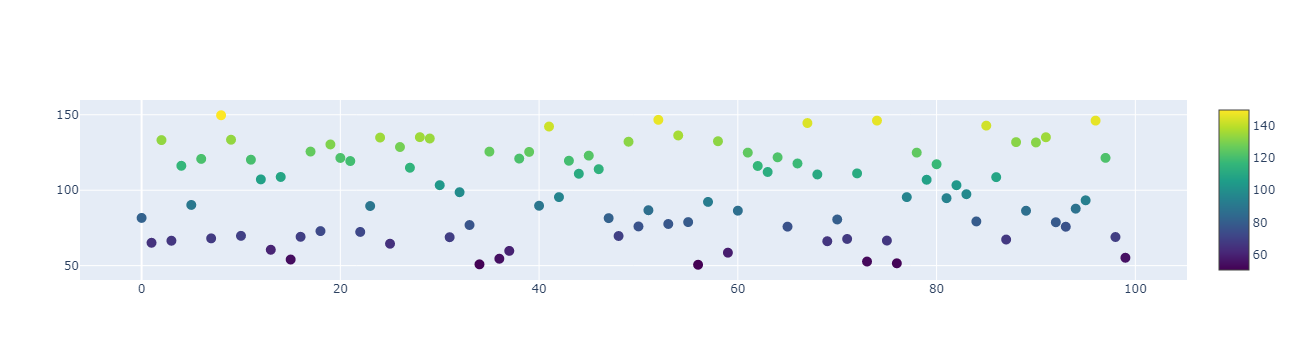

In [14]:
y = np.random.uniform(low=50, high=150, size=100)

fig = go.Figure(
    data=go.Scatter(
        y=y,
        mode='markers',
        marker=dict(
            size=10,
            color=y, # set color equal to a variable
            colorscale='Viridis', # one of plotly colorscales
            showscale=True,
        ),
    ),
)
fig.show()

### Error bars

Error bars can be added for `x` and/or `y`, with a number of options for their `type`.

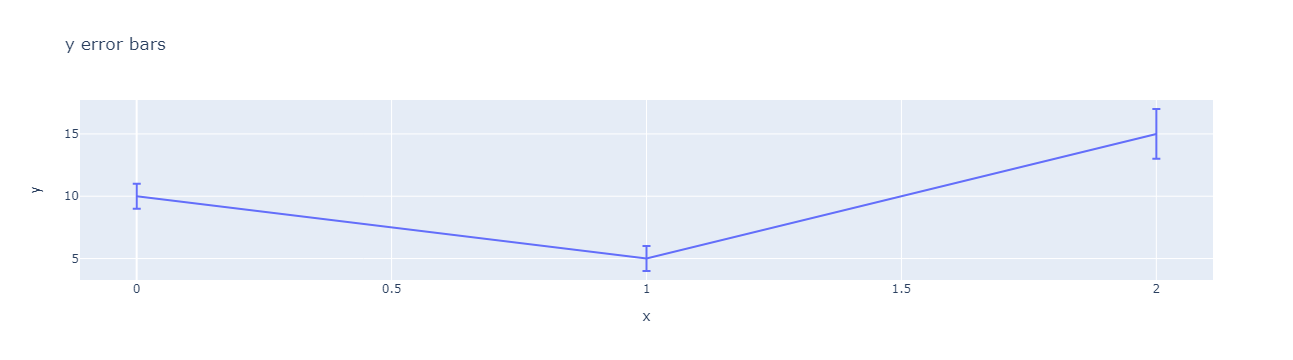

In [15]:
fig = go.Figure(
    data=go.Scatter(
        x=[0, 1, 2], y=[10, 5, 15],
        error_y=dict(
            type='data',  # value of error bar given in data coordinates
            array=[1, 1, 2],
            visible=True,
        ),
        mode="lines",
    ),
)
fig.update_layout(title='y error bars',
                  xaxis_title="x",
                  yaxis_title="y",
                 )
fig.show()

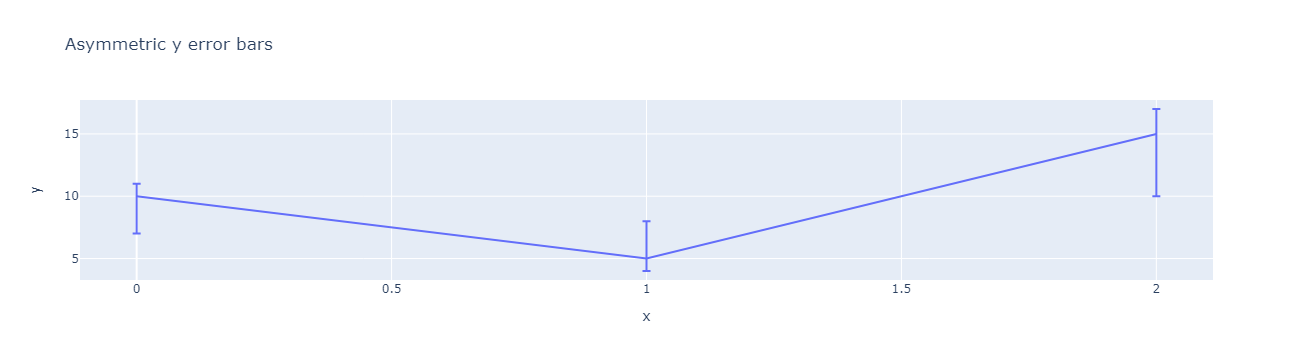

In [16]:
fig = go.Figure(
    data=go.Scatter(
        x=[0, 1, 2], y=[10, 5, 15],
        error_y=dict(
            type='data',
            symmetric=False,  # asymmetric error bars
            array=[1, 3, 2],
            arrayminus=[3, 1, 5], 
            visible=True,
        ),
        mode="lines",
    ),
)
fig.update_layout(title='Asymmetric y error bars',
                  xaxis_title="x",
                  yaxis_title="y",
                 )
fig.show()

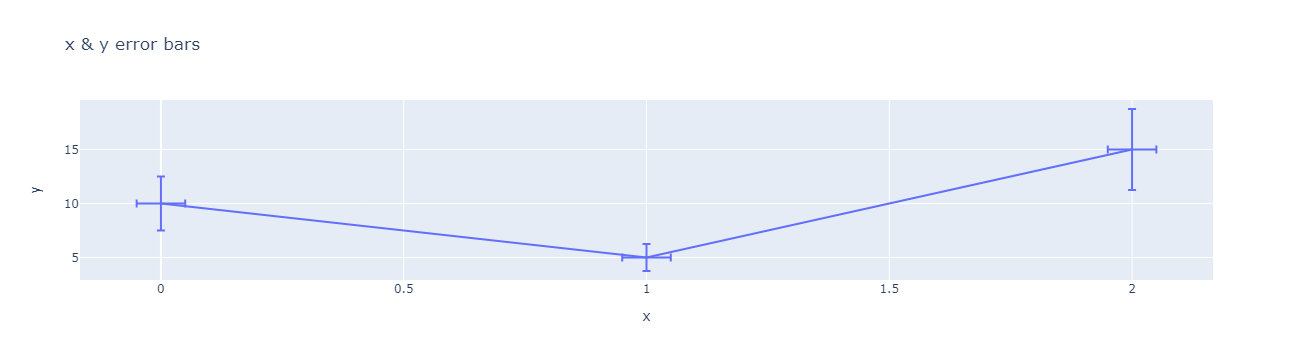

In [17]:
fig = go.Figure(
    data=go.Scatter(
        x=[0, 1, 2], y=[10, 5, 15],
        error_y=dict(
            type='percent',  # value of error bar given in percentage of y value
            value=25,
            visible=True,
        ),
        error_x=dict(
            type='constant',  # value of error bar given as a constant value
            value=0.05,
            visible=True,
        ),
        mode="lines",
    ),
)
fig.update_layout(title='x & y error bars',
                  xaxis_title="x",
                  yaxis_title="y",
                 )
fig.show()

### Hovertext

One of the Unique features of Plotly is the Data Labels on Hover

In [18]:
iris = px.data.iris()
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

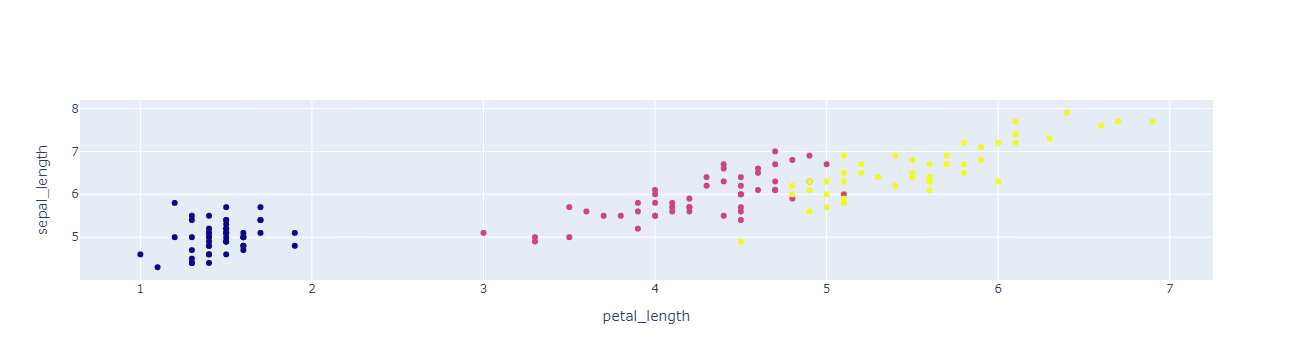

In [19]:
fig = go.Figure(
    data=go.Scatter(
        x=iris["petal_length"],
        y=iris["sepal_length"],
        mode="markers",
        marker_color=iris["species_id"],
        text=iris["species"],  # add hovertext
    )
)
fig.update_layout(xaxis_title="petal_length",
                  yaxis_title="sepal_length",
                 )
fig.show()

## Plotly Expess

`plotly.express` (usually imported as `px`) is a high-level module that contains functions to instantly create entire figures, often in a single line of code.

`plotly.express` is built *on top of* `plotly.graph_objects`. Every Plotly Express function uses graph objects internally and returns a `plotly.graph_objects.Figure` instance. Any figure created in a single function call with Plotly Express could be created using `plotly.graph_objects` as well, but with between 5 and 100 times more code.

The relationship between `plotly.express` and `plotly.graph_objects` is similar to that between `seaborn` and `matplotlib`.

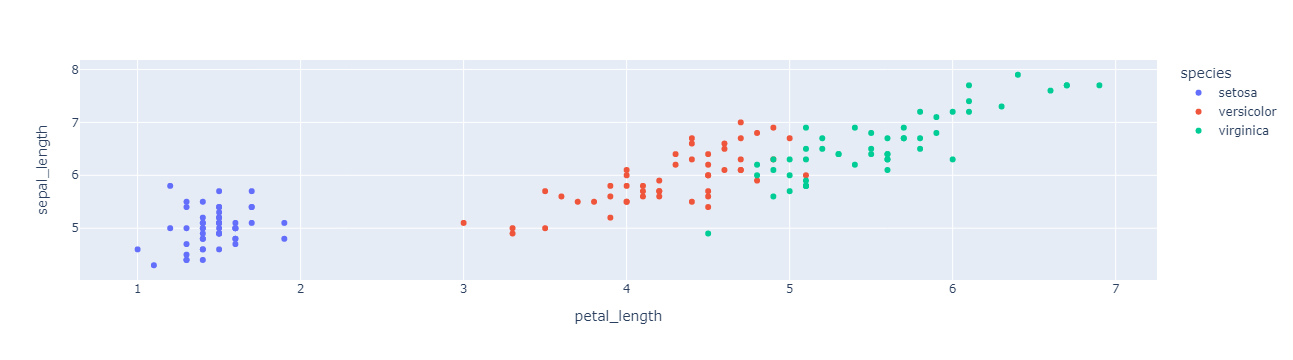

In [20]:
fig = px.scatter(iris, x="petal_length", y="sepal_length", color="species")
fig.show()

Just like with `seaborn`, you can add marginal plots, trendlines, change the template and do many more things within the **single function call**.

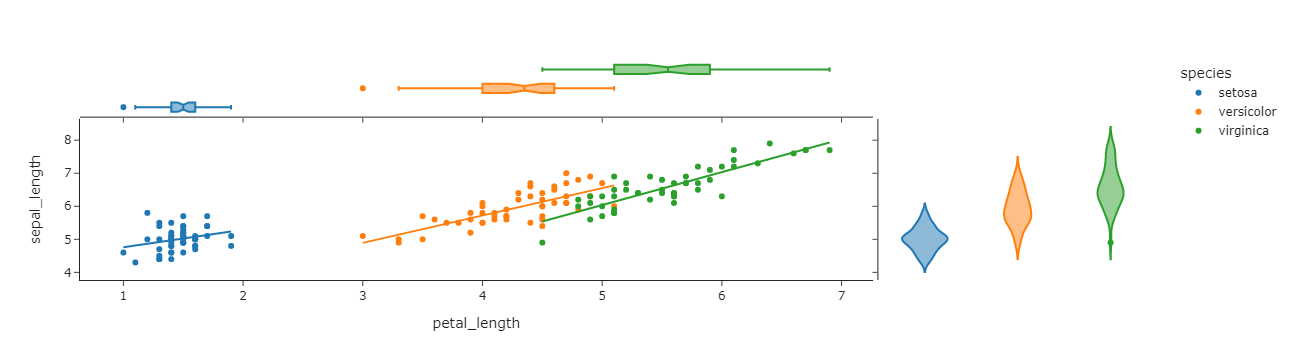

In [21]:
fig = px.scatter(iris, x="petal_length", y="sepal_length", color="species",
                 marginal_y="violin", marginal_x="box",  # add marginal plots
                 trendline="ols",  # add linear trendline (ordinary least squares)
                 template="simple_white",  # change template
                )
fig.show()

You can easily visualize multiple relations at the same time using a **Scatterplot Matrix**:

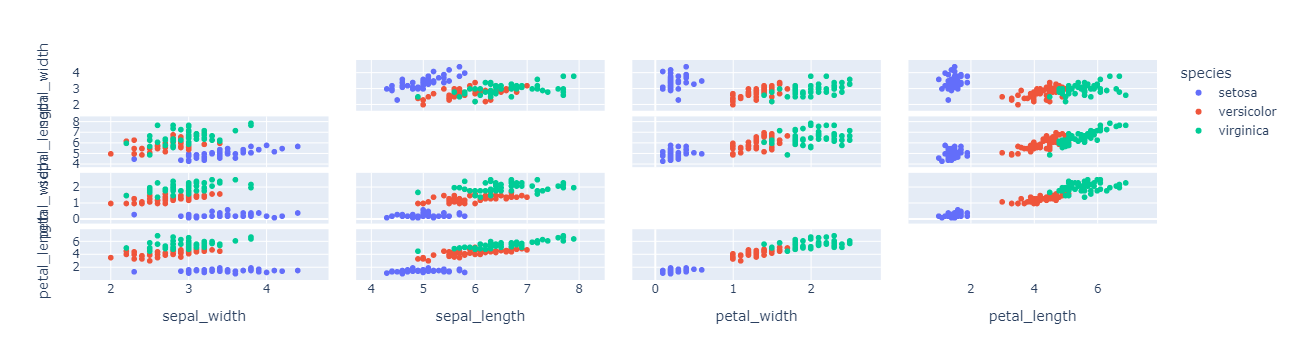

In [22]:
fig = px.scatter_matrix(iris, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color="species",
                       )
fig.update_traces(diagonal_visible=False)
fig.show()

Or create your own **Facet plots**:

In [23]:
tips = px.data.tips()
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

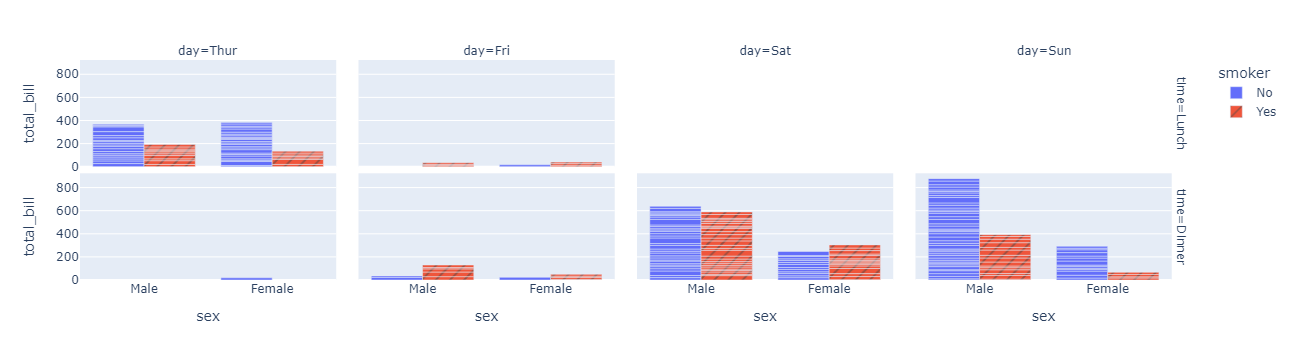

In [24]:
fig = px.bar(tips, x="sex", y="total_bill",
             barmode="group",  # show bars side by side
             color="smoker", pattern_shape="smoker",  # color and pattern based on variables
             facet_row="time", facet_col="day",  # set facets
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]},  # optional
            )
fig.show()

Adding **hover text** is straightforward:

In [26]:
df = px.data.gapminder()
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

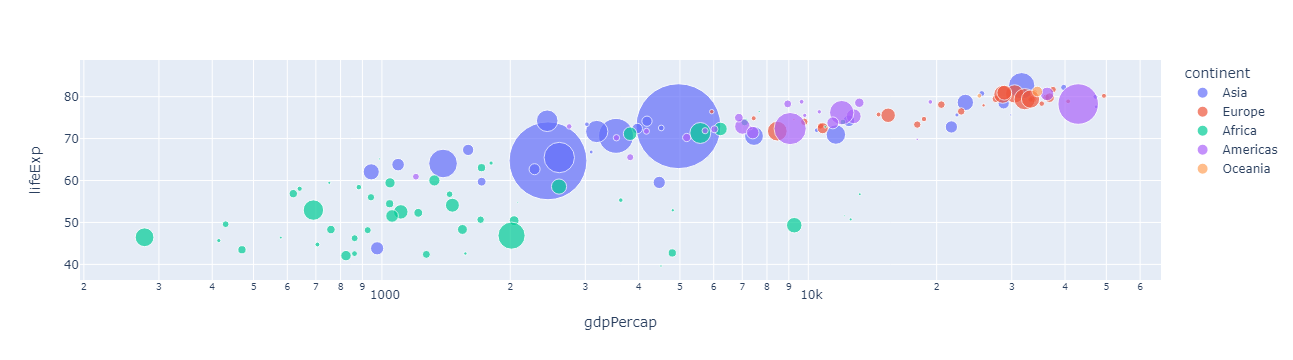

In [27]:
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 color="continent", size="pop", size_max=60,
                 hover_name="country",
                 log_x=True)
fig.show()

Animations can be quite easy as well!

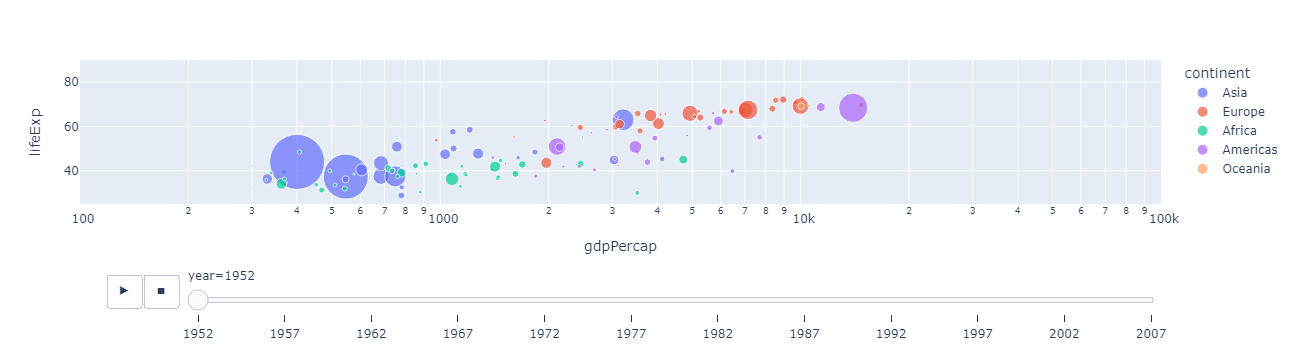

In [28]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 color="continent", size="pop", size_max=60,
                 hover_name="country",
                 animation_frame="year", animation_group="country",  # add animation
                 log_x=True,
                 range_x=[100,100000], range_y=[25,90]  # add limits
                )
fig.show()

## Figure Aesthetics

Plotly comes pre-loaded with several themes that you can get started using right away, and you can also define your own.

In [29]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

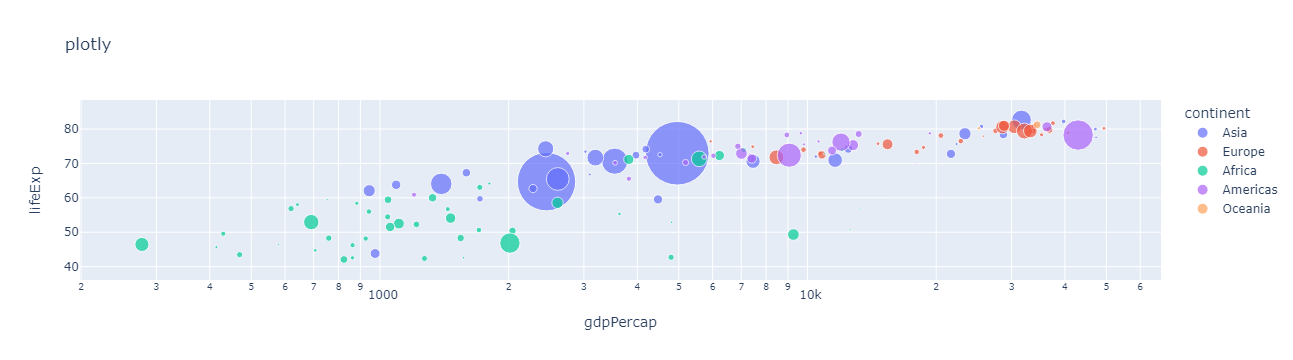

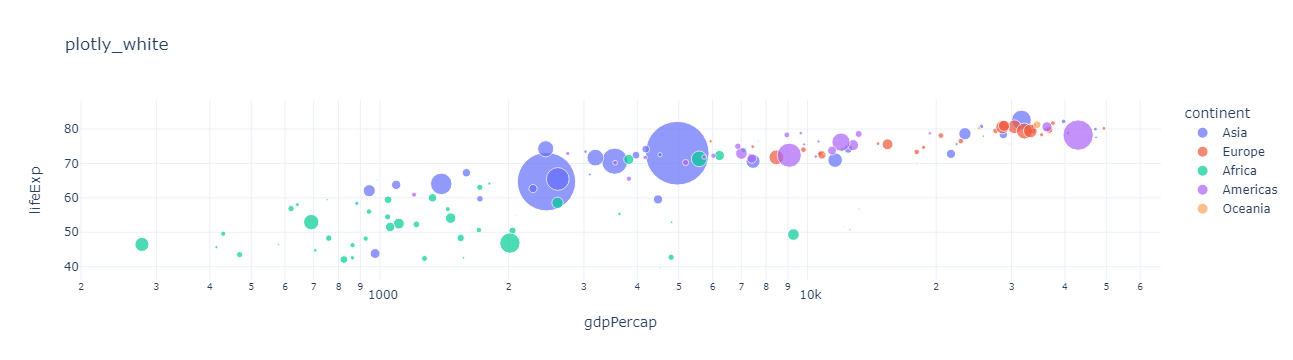

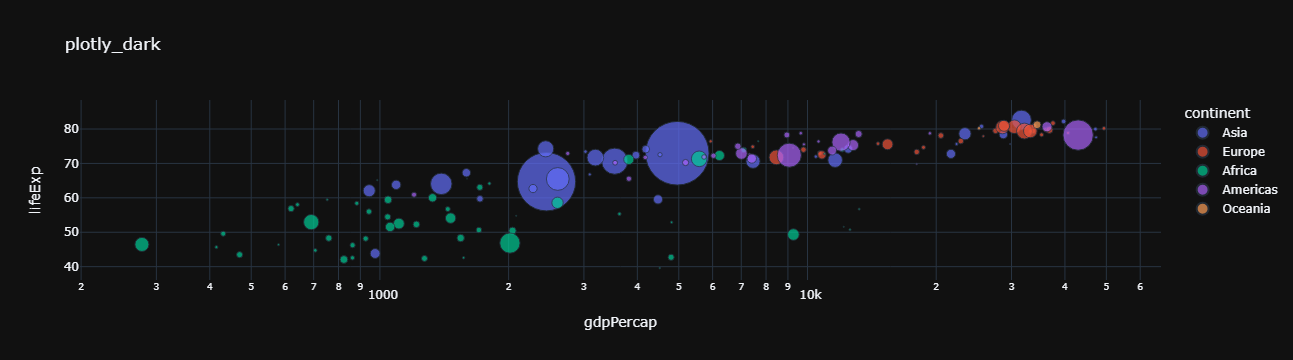

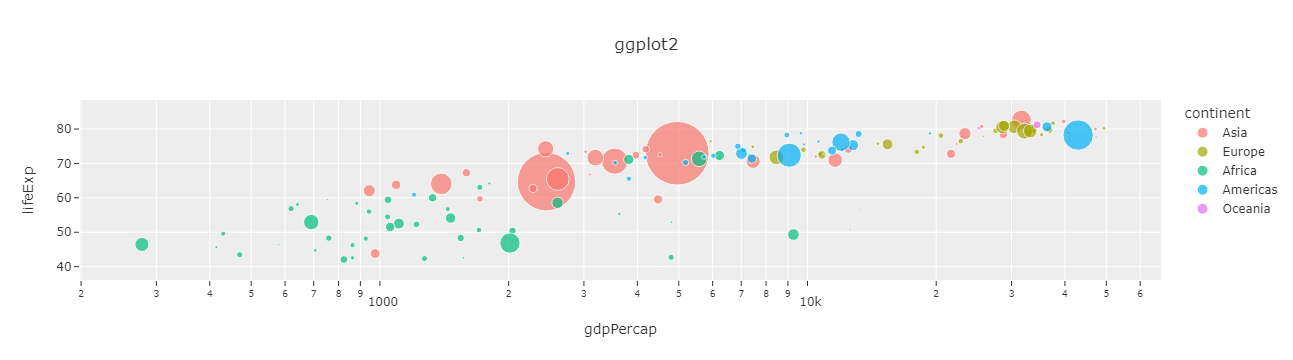

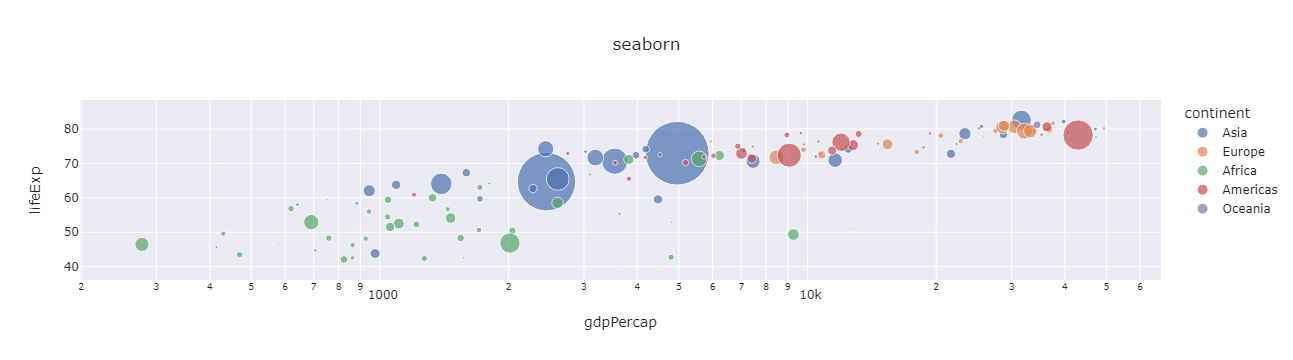

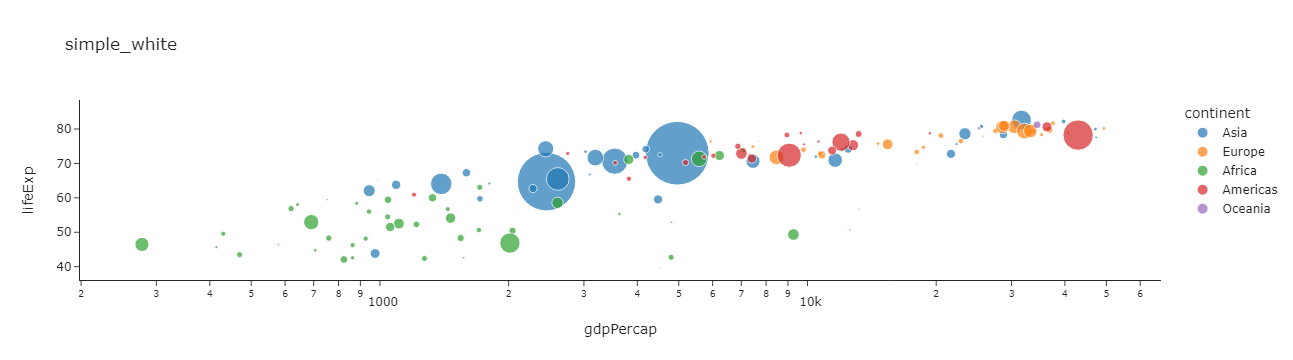

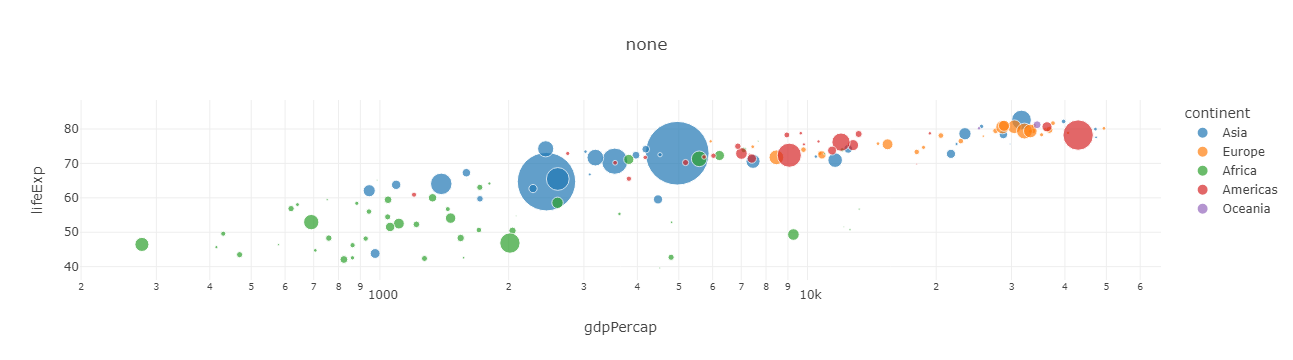

In [30]:
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                     color="continent", size="pop", size_max=45,
                     hover_name="country",
                     log_x=True,
                     template=template,  # change template
                     title=template,
                    )
    fig.show()

## Saving Figures

Plotly figures can be exported as HTML files so they remain interactive when viewed in a web browser.

They can also be exported as static image file formats like PNG, JPEG, SVG or PDF. However, you will need to install the `kaleido` package to do this: `conda install -c conda-forge python-kaleido`

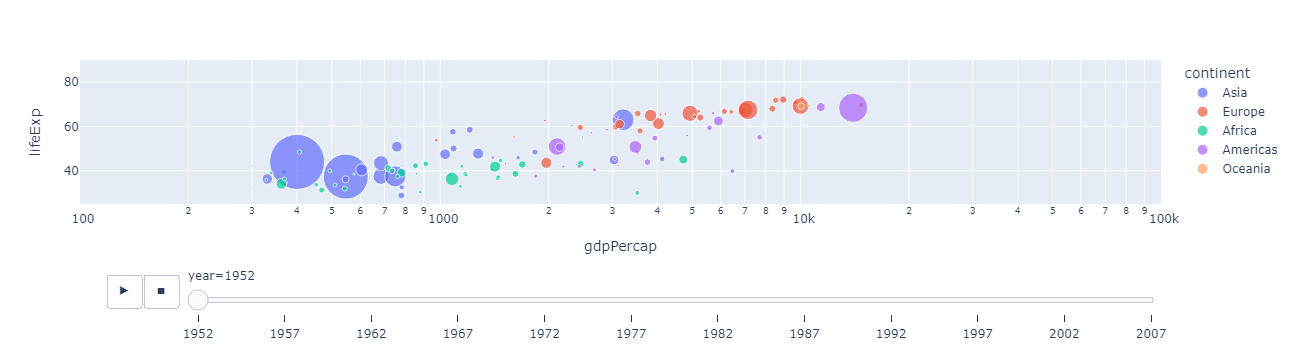

In [ ]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 color="continent", size="pop", size_max=60,
                 hover_name="country",
                 animation_frame="year", animation_group="country",  # add animation
                 log_x=True,
                 range_x=[100,100000], range_y=[25,90]  # add limits
                )
fig.show()
fig.write_html("figure.html")
fig.write_image("figure.png")